# CSC 767 Neural Networks and Deep Learning FINAL EXAM

1) Execute forward and backward modes of neural network by hand or by using Python (your choice) for 3 iterations (epochs). 

2) The model is shown in Fig. 1. This network comprises of a hidden layer with 3 ReLU units and a squared-error loss
3) (Note: Use tanh as activation function in the output unit and ReLU for hidden layer)

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initialize the weights to these random values that is given

That code thats in these file, written 3 years ago by myself in another class as a competition. 
For that reason, its including bias even we don't need them in this final exam. I didn't remove it on purpose because regular Neural Network should include a bias paramater.
I make alteration and simplified more.

The logic/Algorithm:

We are creating a function to define our given variables

![title](weights.png)


In [2]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    
    parameters = {"weight1":np.array([[0.60,0.70,0.00],[0.01,0.43,0.88]]) ,
                  "bias1": np.zeros((4,3)),
                  "weight2": np.array([[0.02],[0.03],[0.9]]),
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

# Creating RELU Activation Function

![title](relu.png)


In [3]:
def relu(z):


    y_head = np.maximum(0,z)
    return y_head



    

# Creating Tanh Activation Function

![title](tanh.png)


In [4]:
def tanh(z):
    y_head=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return y_head

Step 1: Matrix multiplication between data and weights 

Step 2: Add the bias 
Step 3: Pass through from activation function

Step 4: Repeat again and set the variables for the next layer (output or next hidden layer) 

Step5: Return the paramaters


In [5]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(x_train,parameters["weight1"],out=None) +parameters["bias1"]
    A1 = relu(Z1)
    Z2 = np.dot(A1,parameters["weight2"],out=None) + parameters["bias2"]
    A2 = tanh(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Step 1: Read the paramaters that is coming from Forward Propagation
    
Step 2: Make derivation calculation for each weights / Gradient descent calculation

Step5: Return the gradients


In [6]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(cache["A1"].T,dZ2)/X.shape[1]
    
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(dZ2,parameters["weight2"].T)*(1 - np.power(cache["A1"], 2))
    
    dW1 = np.dot(X.T,dZ1)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

We are updating the parameters so we can train and make Forward Propagation after the Backward Propagation 

In [7]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    return parameters

Calculating the cost and loss to track model training.

The lost function defined as A squared-Error loss function.

In [8]:
def compute_cost_lost_NN(A2, Y, parameters):
    #logprobs = np.multiply(np.log(A2),Y)
    loss = np.square(np.subtract(Y,A2)).mean()
    cost = -np.sum(loss)/Y.shape[1]
    return cost, loss

Defining the Neural Network and  training our model

In [9]:

def neural_network(x_train, y_train,x_test,y_test, num_iterations):
    index_list = []
    loss_list=[]
    
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost, loss = compute_cost_lost_NN(A2, y_train, parameters)
        #print(cost,loss)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        loss_list.append(loss)
        index_list.append(i)
        print("Loss after iteration %i: %f" %(i, loss))
        print("Updated Weight 1 :{}".format(parameters["weight1"]))
        print("Updated Weight 2 :{}".format(parameters["weight2"]))

    
    plt.plot(index_list,loss_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Loss")
    plt.show()
    
    # Print train/test Errors
    return parameters



Loss after iteration 0: 1.132150
Updated Weight 1 :[[0.60014064 0.70018511 0.00331513]
 [0.0099111  0.42983935 0.8783618 ]]
Updated Weight 2 :[[0.0209254 ]
 [0.03198028]
 [0.89618023]]
Loss after iteration 1: 1.115166
Updated Weight 1 :[[0.60028652 0.7003806  0.00663912]
 [0.00981883 0.42966936 0.87668015]]
Updated Weight 2 :[[0.02188978]
 [0.03399265]
 [0.89248095]]
Loss after iteration 2: 1.098250
Updated Weight 1 :[[0.60043778 0.70058644 0.00997127]
 [0.0097231  0.42949004 0.8749565 ]]
Updated Weight 2 :[[0.02289201]
 [0.03603592]
 [0.88890146]]
Loss after iteration 3: 1.081405
Updated Weight 1 :[[0.60059457 0.70080256 0.01331081]
 [0.00962384 0.4293014  0.87319228]]
Updated Weight 2 :[[0.02393098]
 [0.03810891]
 [0.88544102]]
Loss after iteration 4: 1.064637
Updated Weight 1 :[[0.60075698 0.70102889 0.01665698]
 [0.00952096 0.42910348 0.87138896]]
Updated Weight 2 :[[0.0250056 ]
 [0.04021049]
 [0.88209884]]
Loss after iteration 5: 1.047949
Updated Weight 1 :[[0.60092514 0.70126535 

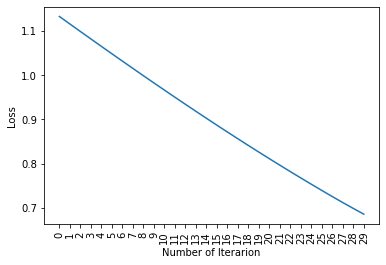

In [10]:
x= np.array([[0.75,0.80],[0.20,0.05],[-0.75,0.80],[0.20,-0.05] ])
y= np.array([[1],[1],[-1],[-1]])

parameters = neural_network(x, y,x,y, num_iterations=30)